In [1]:
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'GlobalLandTemperaturesByState.csv')
df.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
5,1855-10-01,25.442,1.179,Acre,Brazil
6,1855-11-01,25.400,1.064,Acre,Brazil
7,1855-12-01,24.100,1.718,Acre,Brazil
8,1856-01-01,25.814,1.159,Acre,Brazil
9,1856-02-01,24.658,1.147,Acre,Brazil


In [4]:
df.dtypes



dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [5]:
df.shape

(645675, 5)

In [6]:
df.isnull().sum()


dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [7]:
df = df.dropna(how='any', axis=0)
df

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645669,2013-04-01,15.710,0.461,Zhejiang,China
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China


In [8]:
df.rename(columns={'dt': 'Date','AverageTemperature':'avg_temp', 'AverageTemperatureUncertainty':'confidence_interval_temp' }, inplace=True)
df

,Date,avg_temp,confidence_interval_temp,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645669,2013-04-01,15.710,0.461,Zhejiang,China
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China


In [9]:
df['Date']= pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=620027, freq=None)

In [10]:
df.describe()


,avg_temp,confidence_interval_temp
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [11]:
df['Year']= df.index.year
df.head()

,avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [12]:
df.describe()

,avg_temp,confidence_interval_temp,Year
count,620027.000000,620027.000000,620027.000000
mean,8.993111,1.287647,1902.331598
std,13.772150,1.360392,67.831393
min,-45.389000,0.036000,1743.000000
25%,-0.693000,0.316000,1851.000000
50%,11.199000,0.656000,1906.000000
75%,19.899000,1.850000,1960.000000
max,36.339000,12.646000,2013.000000


In [13]:
latest_df = df.loc['1980':'2013']
latest_df.head()

,avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980


In [14]:
latest_df[['Country','avg_temp']].groupby(['Country']).mean().sort_values('avg_temp')

,avg_temp
Country,
Canada,-0.681256
Russia,2.432833
United States,11.516373
China,12.150210
Australia,18.447621
India,22.871669
Brazil,24.537580


In [20]:
resample_df = latest_df[['avg_temp']].resample('A').mean()

In [22]:
resample_df.head()

,avg_temp
Date,
1980-12-31,9.689856
1981-12-31,10.366578
1982-12-31,9.837958
1983-12-31,10.259516
1984-12-31,9.724950


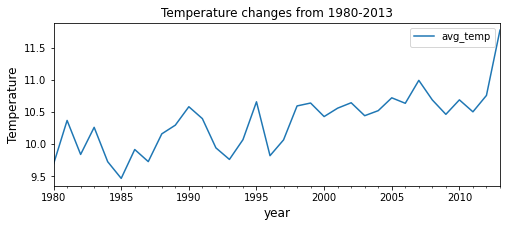

In [23]:
resample_df.plot(title='Temperature changes from 1980-2013', figsize=(8,3))
plt.ylabel('Temperature', fontsize=12)
plt.xlabel('year',fontsize=12)
plt.legend()

In [50]:
from statsmodels.tsa.stattools import adfuller
print('Dickey fuller Test results:')
test_df=adfuller(resample_df.iloc[:,0].values,autolag='AIC')
df_output = pd.Series(test_df[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key, value in test_df[4].items():
    df_output['Critical Value (%s)'%key]= value
print(df_output)

Dickey fuller Test results:
Test Statistic                 -0.728209
p-value                         0.839307
Lags Used                       2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [59]:
decomp = seasonal_decompose(resample_df)


trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid 

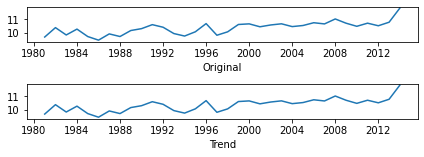

In [60]:
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.Figure(figsize=(6,5))

plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.Figure(figsize=(6,5))


plt.tight_layout()

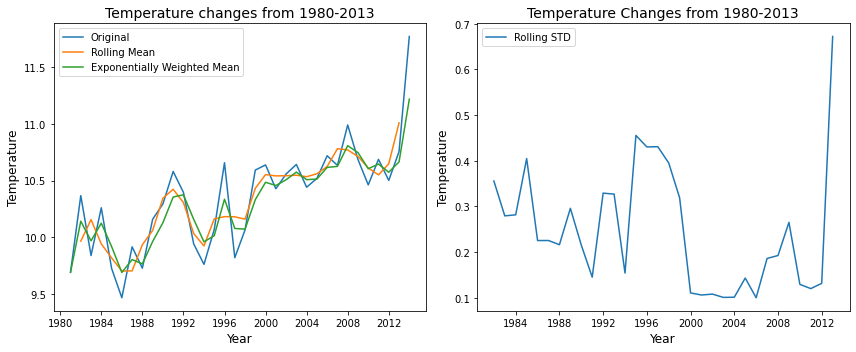

In [65]:
rol_mean = resample_df.rolling(window=3, center=True).mean()

ewm = resample_df.ewm(span=3).mean()

rol_std = resample_df.rolling(window=3, center=True).std()

fig, (ax1,ax2)= plt.subplots(1,2, figsize=(12,5))

ax1.plot(resample_df, label='Original')
ax1.plot(rol_mean,label='Rolling Mean')
ax1.plot(ewm, label= 'Exponentially Weighted Mean')
ax1.set_title('Temperature changes from 1980-2013', fontsize =14)
ax1.set_ylabel('Temperature', fontsize=12)
ax1.set_xlabel('Year', fontsize=12)
ax1.legend()

ax2.plot(rol_std,label= 'Rolling STD')
ax2.set_title('Temperature Changes from 1980-2013', fontsize=14)
ax2.set_ylabel('Temperature', fontsize=12)
ax2.set_xlabel('Year', fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [67]:
rol_mean.dropna(inplace =True)
ewm.dropna (inplace=True)

print('Dickey Fuller Test for rolling mean')
df_test=adfuller(rol_mean.iloc[:,0].values,autolag='AIC')
df_output = pd.Series(test_df[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key, value in test_df[4].items():
    df_output['Critical Value (%s)'%key]= value
print(df_output)

print('')
print('Dickney-Fuller Test for the Exponentially Weighted Mean:')
df_test= adfuller(ewm.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','Lags used','Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key]= value
print(df_output)

Dickey Fuller Test for rolling mean
Test Statistic                 -0.728209
p-value                         0.839307
Lags Used                       2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64

Dickney-Fuller Test for the Exponentially Weighted Mean:
Test Statistic                 -0.338693
p-value                         0.919843
Lags used                       2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [68]:
diff_rol_mean =resample_df - rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,avg_temp
Date,
1981-12-31,0.401781
1982-12-31,-0.316726
1983-12-31,0.318708
1984-12-31,-0.091684
1985-12-31,-0.236199


In [69]:
diff_ewm =resample_df - ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,avg_temp
Date,
1980-12-31,0.000000
1981-12-31,0.225574
1982-12-31,-0.129877
1983-12-31,0.136118
1984-12-31,-0.192797


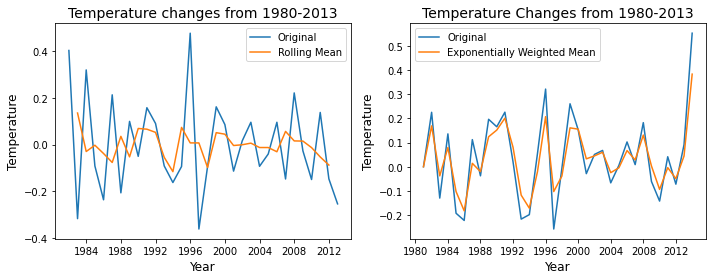

In [84]:
df_rol_mean_diff = diff_rol_mean.rolling(window=3, center=True).mean()

df_ewm_diff = diff_ewm.ewm(span=2).mean()

rol_std = resample_df.rolling(window=3, center=True).std()

fig, (ax1,ax2)= plt.subplots(1,2, figsize=(10,4))

ax1.plot(diff_rol_mean, label='Original')
ax1.plot(df_rol_mean_diff,label='Rolling Mean')
ax1.set_title('Temperature changes from 1980-2013', fontsize =14)
ax1.set_ylabel('Temperature', fontsize=12)
ax1.set_xlabel('Year', fontsize=12)
ax1.legend()

ax2.plot(diff_ewm,label= 'Original')
ax2.plot(df_ewm_diff,label='Exponentially Weighted Mean')
ax2.set_title('Temperature Changes from 1980-2013', fontsize=14)
ax2.set_ylabel('Temperature', fontsize=12)
ax2.set_xlabel('Year', fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [74]:
print('Dickey fuller Test results for the difference between Original and Rolling mean:')
dftest=adfuller(diff_rol_mean.iloc[:,0].values,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]= value
print(dfoutput)
print('')
print('Dickey-fuller test for the difference between the original and Exponentially Weighted mean')
dftest=adfuller(diff_ewm.iloc[:,0].values,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]= value
print(dfoutput)

Dickey fuller Test results for the difference between Original and Rolling mean:
Test Statistic                -7.007710e+00
p-value                        7.051586e-10
#Lags Used                     1.000000e+00
Number of Observations Used    3.000000e+01
Critical Value (1%)           -3.669920e+00
Critical Value (5%)           -2.964071e+00
Critical Value (10%)          -2.621171e+00
dtype: float64

Dickey-fuller test for the difference between the original and Exponentially Weighted mean
Test Statistic                 -4.297446
p-value                         0.000449
#Lags Used                      1.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

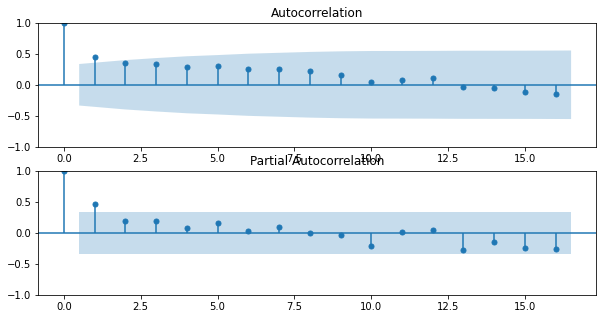

In [80]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot


pyplot.figure(figsize=(10,5))
pyplot.subplot(211)
plot_acf(resample_df,ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(resample_df,ax=pyplot.gca())
pyplot.show
